<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-데이터-다운로드" data-toc-modified-id="Step-1.-데이터-다운로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1. 데이터 다운로드</a></span></li><li><span><a href="#Step-2.-데이터-정제-및-토큰화" data-toc-modified-id="Step-2.-데이터-정제-및-토큰화-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2. 데이터 정제 및 토큰화</a></span></li><li><span><a href="#Step-3.-모델설계" data-toc-modified-id="Step-3.-모델설계-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3. 모델설계</a></span><ul class="toc-item"><li><span><a href="#Positional-Encoding" data-toc-modified-id="Positional-Encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Positional Encoding</a></span></li><li><span><a href="#Multi-Head-Attention" data-toc-modified-id="Multi-Head-Attention-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multi-Head Attention</a></span></li><li><span><a href="#Position-wise-Feed-Forward-Network" data-toc-modified-id="Position-wise-Feed-Forward-Network-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Position-wise Feed-Forward Network</a></span></li><li><span><a href="#Encoder-레이어-구현하기" data-toc-modified-id="Encoder-레이어-구현하기-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Encoder 레이어 구현하기</a></span></li><li><span><a href="#Decoder-레이어-구현하기" data-toc-modified-id="Decoder-레이어-구현하기-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decoder 레이어 구현하기</a></span></li><li><span><a href="#Encoder와-Decoder-클래스를-정의" data-toc-modified-id="Encoder와-Decoder-클래스를-정의-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Encoder와 Decoder 클래스를 정의</a></span></li><li><span><a href="#Transformer-완성하기" data-toc-modified-id="Transformer-완성하기-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Transformer 완성하기</a></span></li><li><span><a href="#Mask" data-toc-modified-id="Mask-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Mask</a></span></li></ul></li><li><span><a href="#Step-4.-훈련하기" data-toc-modified-id="Step-4.-훈련하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 4. 훈련하기</a></span><ul class="toc-item"><li><span><a href="#Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언" data-toc-modified-id="Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언</a></span></li><li><span><a href="#Loss-함수를-정의" data-toc-modified-id="Loss-함수를-정의-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loss 함수를 정의</a></span></li><li><span><a href="#train_step-함수를-정의" data-toc-modified-id="train_step-함수를-정의-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>train_step 함수를 정의</a></span></li><li><span><a href="#Attention-시각화-함수" data-toc-modified-id="Attention-시각화-함수-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Attention 시각화 함수</a></span></li><li><span><a href="#번역생성함수" data-toc-modified-id="번역생성함수-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>번역생성함수</a></span></li><li><span><a href="#학습" data-toc-modified-id="학습-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>학습</a></span></li></ul></li><li><span><a href="#Step-5.-평가" data-toc-modified-id="Step-5.-평가-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5. 평가</a></span></li></ul></div>

In [1]:
# np.__version__
# tf.__version__
# !pip install -U numpy
# !pip3 list

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io


# from tqdm import tqdm_notebook 
from tqdm.notebook import tqdm 
import random

import sentencepiece as spm
from konlpy.tag import Mecab

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


# Step 1. 데이터 다운로드
   

In [3]:
# train data load
data_dir = os.getenv('HOME')+'/aiffel/aiffelthon/meta' # 파일 경로 지정
data_train_path = data_dir+"/train_v_final_0310.csv"
data_test_path = data_dir+"/test_v_final_0310.csv"
full_data = pd.read_csv(data_train_path)
full_data_test = pd.read_csv(data_test_path)

In [4]:
full_data.head()

,reg,topic,eng,dial
0,jd,역사,I've changed my mind a little bit.,생각이 쪼금씩 바뀌드라고
1,jd,가족,You know what? Foreigners still get used to it.,웜마 알겄는가 애국인들이 그또 달 적응하고
2,jd,건강,"All of a sudden, I think I've ripped off my ap...",아으 갑자기 에전에 맹장 뜯은 게잉 생각난디야.
3,jd,스타일,I have a lot of ideas about getting older in a...,보먼은 좀 품위 있게 나이 들어가야 되겠단 싱각을 참 마이 해요잉.
4,jd,먹거리,"It's a little bit of a tastey, but still...",약깐 좀 약깐 맛이가 쪼까 머시기 카긴 한디 그또


In [5]:
full_data_test.head()

,reg,topic,eng,dial
0,jd,쇼핑,There's one person over there who's going to b...,쩌그 헌 사람은 나이 인자 륙십 세신가 된닥 근게 고칠만 하제 그는 나이가 있응께
1,jd,방송/연예,Or they do things like taking money instead bu...,아니믄 대신 돈을 받어 준다거나 이른 껄 한디 인자 뭣하러 여리 마잉 포장을 헐라...
2,jd,가족,So its systematically organized even if its no...,긍게 허벌 꺠끗하진 않아도 나름 체계적으로 정리가 되야 있어. 난테 마 용돈을 하...
3,jd,영화,When you go on a cruise why do you rest once i...,크루즈 여행을 가나 보믄 언니야 뭣하러 중간에 헌 번씩 쉬자네.
4,jd,성격,Now everyone knows each other like this but he...,인자 다들 니 명이서는 서로 이르케 맨 알고잉 있으야 가 성격을 근디 가한테는 직접...


In [6]:
#for test
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data = full_data[:10000]
full_data

,reg,topic,eng,dial
0,jd,드라마,"But listen to history, not history. Anyway any...",근디 역사 아잉 역사도 들어봐봐. 워매 암튼 먼가 암튼 당신을 내를 하도 사랑해...
1,kw,가족,I was nervous about her earlier.,아깨는 그이 예나 때미에 신겡이 쓰여서.
2,jj,여행지(국내/해외),Then I was going to the Louvre that day It was...,거 담에 루브르 박물관 가젠 그날 일정이언.
3,jj,다이어트,Oh lets walk a little longer and it becomes li...,아게 쪼꼬만 더이 걷게 영 되드라고
4,jj,연애/결혼,So youre so smart What's the Messankits? I tol...,게난 요망진게 메종키츠네가 뭐? 연락주라 영 했는데? 아게 오빠덜토 말앙 한 ...
...,...,...,...,...
9995,kw,가족,I'm not ignoring people. Just involuntarily. I...,사램 무시하는 것두 아니고. 처레미 무심절에. 아재가 그른 게 얘기하고 댕기는 ...
9996,jd,전자기기,"There are so many good things, but there are s...",조요운 점이 하도 많애 근디 안 조요운 것들도 하도 많고잉
9997,cc,가족,Even if youre going to do a tree from outside ...,바깥이서 나무하러도 글로 랑 속을루 검거지 끌구
9998,jd,쇼핑,"And in fact, when I was raising kids,",끄꼬 실은 얘들 키고 있을 땐


In [7]:
#for test
full_data_test = full_data_test.sample(frac=1).reset_index(drop=True)
full_data_test = full_data_test[:500]
full_data_test

,reg,topic,eng,dial
0,cc,선물,Of course not all of them are like that but th...,물론 쌤이 다 그른 껀 아녀 쌤도 나한티 선물도 주구유 이케 했는디 으 서루 만나...
1,cc,가족,So his brother-in-law's business is a business...,그까 지 사업을 형부가 장사를 해니께 구 안엣다가 인자 쳇 푸 그~ 다람쥐 쳇바퀴 ...
2,cc,공연,I think its different from what you see in a b...,인자 학실히 쫌 그~ 큰 디서 보는 꺼랑 느낌이 다르긴 핸 꺼 같어 소극장에는 소극...
3,jd,아르바이트,Its okay but the owner of the specifications i...,괜찮은디 사양 사장도 아따 죄송합니다 마잉 이래블믄은 성가셔브러.
4,jd,회사/학교,I thust so I thought. I've got a little bit of...,긍께 근갑다 했어. 내도 쫌 좀 뭘라까 좀 고거 생기는디 근디 일오 학번에 긍게...
...,...,...,...,...
495,kw,날씨,"No, it's getting late. It turns out that Japan...",아뇨 양신 늦어지서 있사. 요 연구를 통하라우 일본어가 기원전 이백년에 츰 생겨났...
496,cc,아르바이트,Iss the parttime job you started first. So it ...,가장 첨 시작한 아르바이트는유. 그까 뷔페 찝을 쫌 그래두 힘들었지만 그래두 쫌 ...
497,kw,가족,She's gonna do it again. Can you talk to your ...,이무는 또 알 거야. 당시이 어머님한테 야기 좀 하면은 아이 돼? 군인들이 삼십...
498,gs,SNS,I felt like I was looking at someone else's In...,다른 사람의 인스타를 보믄서 디께 열등감도 느끼긴 했지마 지느 꼬 열등감이 그서 ...


In [8]:
# full_data=pd.concat([full_data, full_data_test], axis=0)

In [9]:
full_data.info() #full_data: 1065918 full_data_test: 500

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reg     10000 non-null  object
 1   topic   10000 non-null  object
 2   eng     10000 non-null  object
 3   dial    10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [10]:
full_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reg     500 non-null    object
 1   topic   500 non-null    object
 2   eng     500 non-null    object
 3   dial    500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [11]:
full_data.isnull().sum()

reg      0
topic    0
eng      0
dial     0
dtype: int64

In [12]:
full_data_test.isnull().sum()

reg      0
topic    0
eng      0
dial     0
dtype: int64

In [13]:
def del_null_dupl(data):
    data=data.dropna(axis=0)
    data=data[~data.duplicated(subset=['reg','topic','eng','dial'], keep= 'first')]
    data=data.reset_index(drop=True)# index reset하기 - 기존 index 제거 O
    return data

In [14]:
full_data=del_null_dupl(full_data) # ['text', 'dial', 'reg', 'eng'])
full_data_test=del_null_dupl(full_data_test) # ['text', 'dial', 'reg', 'eng'])

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reg     10000 non-null  object
 1   topic   10000 non-null  object
 2   eng     10000 non-null  object
 3   dial    10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [16]:
full_data['eng_length'] = full_data['eng'].apply(lambda x : len(str(x).split()))
full_data['dial_length'] = full_data['dial'].apply(lambda x : len(str(x).split()))
# full_data['eng_c_length'] = full_data['eng'].apply(lambda x : len(str(x)))
# full_data['dial_c_length'] = full_data['dial'].apply(lambda x : len(str(x)))

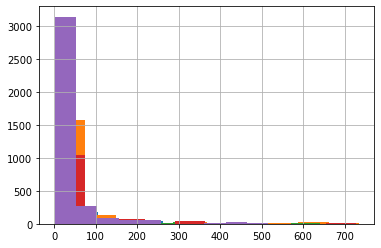

In [17]:
regs = ['jj', 'jd', 'gs', 'cc', 'kw']

for reg in regs:
    count = full_data['eng_length'][full_data['reg']==reg].hist()
#     print(f'Dial_{reg} :', count)

In [18]:
full_data.groupby(full_data['reg'])['eng_length'].mean()

reg
cc    45.358809
gs    42.391486
jd    44.901087
jj    31.830657
kw    30.491539
Name: eng_length, dtype: float64

In [19]:
full_data.groupby(full_data['reg'])['dial_length'].mean()

reg
cc    35.277554
gs    32.995826
jd    33.322826
jj    22.084672
kw    21.264465
Name: dial_length, dtype: float64

In [20]:
# eng_data = full_data[['eng', 'eng_length']]
# eng_data

In [21]:
# dial_data = full_data[['reg', 'dial', 'dial_length']]
# dial_data

In [22]:
full_data["reg_eng"] = "<" + full_data["reg"] +"> "+full_data["eng"]
full_data["reg_eng"]

0       <jd> But listen to history, not history. Anywa...
1                   <kw> I was nervous about her earlier.
2       <jj> Then I was going to the Louvre that day I...
3       <jj> Oh lets walk a little longer and it becom...
4       <jj> So youre so smart What's the Messankits? ...
                              ...                        
9995    <kw> I'm not ignoring people. Just involuntari...
9996    <jd> There are so many good things, but there ...
9997    <cc> Even if youre going to do a tree from out...
9998           <jd> And in fact, when I was raising kids,
9999    <kw> What kind of sweetener are you looking fo...
Name: reg_eng, Length: 10000, dtype: object

In [23]:
full_data_test["reg_eng"] = "<" + full_data_test["reg"] +"> "+full_data_test["eng"]
full_data_test["reg_eng"]

0      <cc> Of course not all of them are like that b...
1      <cc> So his brother-in-law's business is a bus...
2      <cc> I think its different from what you see i...
3      <jd> Its okay but the owner of the specificati...
4      <jd> I thust so I thought. I've got a little b...
                             ...                        
495    <kw> No, it's getting late. It turns out that ...
496    <cc> Iss the parttime job you started first. S...
497    <kw> She's gonna do it again. Can you talk to ...
498    <gs> I felt like I was looking at someone else...
499    <cc> Even if I dont have that money I always h...
Name: reg_eng, Length: 500, dtype: object

In [24]:
full_data

,reg,topic,eng,dial,eng_length,dial_length,reg_eng
0,jd,드라마,"But listen to history, not history. Anyway any...",근디 역사 아잉 역사도 들어봐봐. 워매 암튼 먼가 암튼 당신을 내를 하도 사랑해...,66,61,"<jd> But listen to history, not history. Anywa..."
1,kw,가족,I was nervous about her earlier.,아깨는 그이 예나 때미에 신겡이 쓰여서.,6,6,<kw> I was nervous about her earlier.
2,jj,여행지(국내/해외),Then I was going to the Louvre that day It was...,거 담에 루브르 박물관 가젠 그날 일정이언.,13,7,<jj> Then I was going to the Louvre that day I...
3,jj,다이어트,Oh lets walk a little longer and it becomes li...,아게 쪼꼬만 더이 걷게 영 되드라고,11,6,<jj> Oh lets walk a little longer and it becom...
4,jj,연애/결혼,So youre so smart What's the Messankits? I tol...,게난 요망진게 메종키츠네가 뭐? 연락주라 영 했는데? 아게 오빠덜토 말앙 한 ...,22,13,<jj> So youre so smart What's the Messankits? ...
...,...,...,...,...,...,...,...
9995,kw,가족,I'm not ignoring people. Just involuntarily. I...,사램 무시하는 것두 아니고. 처레미 무심절에. 아재가 그른 게 얘기하고 댕기는 ...,40,28,<kw> I'm not ignoring people. Just involuntari...
9996,jd,전자기기,"There are so many good things, but there are s...",조요운 점이 하도 많애 근디 안 조요운 것들도 하도 많고잉,13,10,"<jd> There are so many good things, but there ..."
9997,cc,가족,Even if youre going to do a tree from outside ...,바깥이서 나무하러도 글로 랑 속을루 검거지 끌구,16,7,<cc> Even if youre going to do a tree from out...
9998,jd,쇼핑,"And in fact, when I was raising kids,",끄꼬 실은 얘들 키고 있을 땐,8,6,"<jd> And in fact, when I was raising kids,"


In [25]:
full_data_test

,reg,topic,eng,dial,reg_eng
0,cc,선물,Of course not all of them are like that but th...,물론 쌤이 다 그른 껀 아녀 쌤도 나한티 선물도 주구유 이케 했는디 으 서루 만나...,<cc> Of course not all of them are like that b...
1,cc,가족,So his brother-in-law's business is a business...,그까 지 사업을 형부가 장사를 해니께 구 안엣다가 인자 쳇 푸 그~ 다람쥐 쳇바퀴 ...,<cc> So his brother-in-law's business is a bus...
2,cc,공연,I think its different from what you see in a b...,인자 학실히 쫌 그~ 큰 디서 보는 꺼랑 느낌이 다르긴 핸 꺼 같어 소극장에는 소극...,<cc> I think its different from what you see i...
3,jd,아르바이트,Its okay but the owner of the specifications i...,괜찮은디 사양 사장도 아따 죄송합니다 마잉 이래블믄은 성가셔브러.,<jd> Its okay but the owner of the specificati...
4,jd,회사/학교,I thust so I thought. I've got a little bit of...,긍께 근갑다 했어. 내도 쫌 좀 뭘라까 좀 고거 생기는디 근디 일오 학번에 긍게...,<jd> I thust so I thought. I've got a little b...
...,...,...,...,...,...
495,kw,날씨,"No, it's getting late. It turns out that Japan...",아뇨 양신 늦어지서 있사. 요 연구를 통하라우 일본어가 기원전 이백년에 츰 생겨났...,"<kw> No, it's getting late. It turns out that ..."
496,cc,아르바이트,Iss the parttime job you started first. So it ...,가장 첨 시작한 아르바이트는유. 그까 뷔페 찝을 쫌 그래두 힘들었지만 그래두 쫌 ...,<cc> Iss the parttime job you started first. S...
497,kw,가족,She's gonna do it again. Can you talk to your ...,이무는 또 알 거야. 당시이 어머님한테 야기 좀 하면은 아이 돼? 군인들이 삼십...,<kw> She's gonna do it again. Can you talk to ...
498,gs,SNS,I felt like I was looking at someone else's In...,다른 사람의 인스타를 보믄서 디께 열등감도 느끼긴 했지마 지느 꼬 열등감이 그서 ...,<gs> I felt like I was looking at someone else...


In [26]:
# # 1. 모든 입력을 소문자로 변환합니다.
# # 2. 알파벳, 문장부호, 한글만 남기고 모두 제거합니다.
# # 3. 문장부호 양옆에 공백을 추가합니다.
# # 4. 문장 앞뒤의 불필요한 공백을 제거합니다.

def preprocess_sentence(sentence):

#     length = len(sentence)
#     match = re.search(r'(.+)\1{3,}', sentence) 
#     if match or length == 0:
#         return None

    sentence = sentence.lower()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!<>가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    sentence = sentence.strip()

    return sentence

In [27]:
# encoder corpus
enc_corpus = full_data['reg_eng'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [28]:
# encoder test corpus
enc_corpus_test = full_data_test['reg_eng'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [29]:
# decoder corpus
dec_corpus = full_data['dial'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [30]:
# decoder corpus test
dec_corpus_test = full_data_test['dial'].apply(lambda x : preprocess_sentence(x)).sort_index()

문장의 최단 길이: 2
문장의 최장 길이: 811
문장의 평균 길이: 42


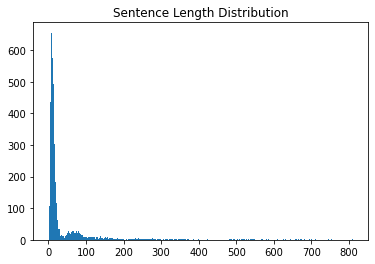

In [31]:
# enc_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in enc_corpus:
    length = len(sen.split())
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(enc_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in enc_corpus:
    sentence_length[len(str(sen).split())-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장의 최단 길이: 1
문장의 최장 길이: 589
문장의 평균 길이: 28


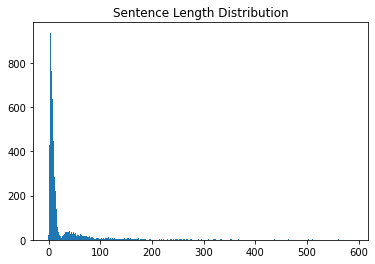

In [32]:
# dec_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in dec_corpus:
    length = len(str(sen).split())
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(dec_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in dec_corpus:
    sentence_length[len(str(sen).split())-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [33]:
len(enc_corpus)

10000

In [34]:
len(dec_corpus)

10000

In [35]:
# #훈련 및 테스트셋 분리
# enc_corpus=enc_corpus[:-100]
# enc_corpus_test = enc_corpus[-100:]
# dec_corpus=dec_corpus[:-100]
# dec_corpus_test = dec_corpus[-100:]

In [36]:
# print(enc_corpus.shape)
# print(enc_corpus_test.shape)
# print(dec_corpus.shape)
# print(dec_corpus_test.shape)

# Step 2. 데이터 정제 및 토큰화

In [37]:
# Train 데이터 정제 및 토큰화
def clean_corpus(enc_corpus, dec_corpus):

    assert len(enc_corpus) == len(dec_corpus) # enc_corpus, dec_corpus가 같은 갯수라는 것을 검증받기 위해 적용

    cleaned_corpus = list(set(zip(enc_corpus, dec_corpus)))  # 중복된 데이터 제거
    
    return cleaned_corpus

cleaned_corpus = clean_corpus(enc_corpus, dec_corpus)
len(cleaned_corpus)

10000

In [38]:
cleaned_corpus

[('<gs> i mean she wants to raise me so i looked it up and it was too much . to watch more sparingly the guide dogs sparingly a little more i brought him brought him and what else would i do now . in c cases like other puppies or other animals threaten shiva dogs aren t that big . where it went where it was i looked but i couldnt see one but when i saw it it suddenly came out while going inside the corner if you want to do it a little too much you re gonna come and kick me in the face . but seeing this i thought dasoon should take good care of her sometimes if i can see it its very uncomfortable because of the tight collar . but the hair is a little low so theyre rather softer on the fourmena lateral side if you want to go on a trip you cant go well and consider everything you can do like this . so this is like a hereditary genetics but on the other side',
  '근꼬 엄마가 키우꼬 싶으대이 하니께네 함 찾아봤는데 느무 쫌 더 걍 지켜마 보느 쪽으로 안내견들을 쫌 쫌 더 이케 데꼬 왔나 데꼬 와갖꼬 고것도 또 인저 어짜겠노 . 따른 강아지나 머 다른 동물들이 위협을 한다던지를 이럴 경우에느

In [39]:
# <PAD> : 0 / <BOS> : 1 / <EOS> : 2 / <UNK> : 3
# <jj> : 4 / <jd> : 5 / <gs> : 6 / <cc> : 7 / <kw> : 8

# Sentencepiece를 활용하여 학습한 tokenizer를 생성
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/corpus_{lang}_r0.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm{lang}_test_r0 --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false'   # model_r0
    )
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm{lang}_test_r0.model') # model_r0

    return tokenizer

In [40]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 4009

enc_corpus = []
dec_corpus = []

for pair in cleaned_corpus:
    e, d = pair[0], pair[1]
    # enc, dec 분리
    enc_corpus.append(e)
    dec_corpus.append(d)

#     enc_corpus.append(preprocess_sentence(e))
#     dec_corpus.append(preprocess_sentence(d))

enc_tokenizer = generate_tokenizer(enc_corpus, SRC_VOCAB_SIZE, "enc")
dec_tokenizer = generate_tokenizer(dec_corpus, TGT_VOCAB_SIZE, "dec")
dec_tokenizer.set_encode_extra_options("bos:eos")

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/aiffelthon/corpus_enc_r0.txt --model_type=bpe --pad_id=0 --bos_id=1 --eos_id=2         --unk_id=3 --model_prefix=spmenc_test_r0 --vocab_size=4009         --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/aiffelthon/corpus_enc_r0.txt
  input_format: 
  model_prefix: spmenc_test_r0
  model_type: BPE
  vocab_size: 4009
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <jj>
  user_defi

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/aiffelthon/corpus_dec_r0.txt --model_type=bpe --pad_id=0 --bos_id=1 --eos_id=2         --unk_id=3 --model_prefix=spmdec_test_r0 --vocab_size=4009         --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/aiffelthon/corpus_dec_r0.txt
  input_format: 
  model_prefix: spmdec_test_r0
  model_type: BPE
  vocab_size: 4009
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <jj>
  user_defi

True

del_trainer.cc(258) LOG(INFO) Added: freq=235 size=380 all=65244 active=6275 piece=지가
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=219 size=400 all=66236 active=7267 piece=▁싫
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=218 min_freq=23
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=200 size=420 all=66823 active=3868 piece=어서
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=191 size=440 all=67412 active=4457 piece=▁몸
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=182 size=460 all=67987 active=5032 piece=하지
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=175 size=480 all=68810 active=5855 piece=더라
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=169 size=500 all=69238 active=6283 piece=▁고로
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=168 min_freq=21
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=164 size=520 all=69685 active=3908 piece=▁멫
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=158 size=540 all=70153 active=4376 piece=하다
bpe_m

In [41]:
print(enc_tokenizer.EncodeAsPieces(enc_corpus[200]))

['▁', '<jd>', '▁or', '▁maybe', '▁it', '▁s', '▁time', '▁for', '▁you', '▁to', '▁lose', '▁your', '▁job', '▁.']


In [42]:
print(dec_tokenizer.EncodeAsPieces(dec_corpus[200]))

['<s>', '▁아니믄', '▁인자', '▁인자', '▁매', '수', '세', '가', '▁', '꺾', '일', '지', '▁몰르', '제', '</s>']


In [43]:
print(enc_tokenizer.EncodeAsIds(enc_corpus[900]))

[3981, 5, 26, 376, 86, 902, 1502, 78, 463, 1305, 390, 86, 575, 59]


In [44]:
print(dec_tokenizer.EncodeAsIds(dec_corpus[900]))

[1, 12, 559, 2625, 2840, 553, 124, 2509, 2630, 2504, 1642, 2503, 3600, 2957, 3108, 553, 43, 2827, 161, 372, 2665, 443, 2683, 1192, 13, 2]


In [45]:
# 토크나이저를 활용해 토큰의 길이가 >5 이상인 데이터를 선별하여 src_corpus 와 tgt_corpus 를 각각 구축하고, 텐서 enc_train 과 dec_train 으로 변환
src_corpus = [] #영어
tgt_corpus = [] #사투리

assert len(enc_corpus) == len(dec_corpus)

# 토큰의 길이가 xxx 이하인 문장만 남깁니다. 
for idx in tqdm(range(len(enc_corpus))):
    src = enc_tokenizer.EncodeAsIds(str(enc_corpus[idx]))
    tgt = dec_tokenizer.EncodeAsIds(str(dec_corpus[idx]))
    
    if len(src) >= 5 : 
        src_corpus.append(src)
        tgt_corpus.append(tgt)

# 패딩처리를 완료하여 학습용 데이터를 완성합니다. 
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post', maxlen=512)
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post', maxlen=512)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [46]:
# # 훈련 데이터와 검증 데이터로 분리하기
# enc_train, enc_val, dec_train, dec_val = train_test_split(enc_data, dec_data, test_size=0.05)

In [47]:
# enc, dec 의 seq_length는 달라도 상관없음.
print(enc_train.shape)
print(dec_train.shape)
# print(enc_val.shape)
# print(dec_val.shape)

(9969, 512)
(9969, 512)


# Step 3. 모델불러오기

In [4]:
# !pip install wandb

In [5]:
import wandb
wandb.login()

In [7]:
#wandb 설정
run  = wandb.init(project = 'PRJ_saturi_model_exp',
                 entity = 'saturi',
                 config = {
                     'model_name':'Vanilla_Transformer_bpe_40009'
                     'n_layers':6,
                     'd_model':512,
                     'n_heads':8,
                     'd_ff':2048,
                     'src_vocab_size':SRC_VOCAB_SIZE,
                     'tgt_vocab_size':TGT_VOCAB_SIZE,
                     'pos_len':512,
                     'dropout':0.2,
                     'shared':True,
                     'batch_size':64,
                     'warmups' : 4000,
                     'epochs':3,
                     'optimizer' :'ADAM',
                     'loss' : 'SparseCategoricalCrossentropy',
                     'metric' : 'bleu'
                     
                 })
config = wandb.config

wandb: Currently logged in as: seuyon0101. Use `wandb login --relogin` to force relogin


True

In [49]:
import sys
sys.path.insert(0,os.getenv('HOME') + '/aiffel/saturi/MODEL/') # vanilla transformer 파일경로에서 불러오기 위해 설정

In [104]:
from vanilla_transformer import Transformer, generate_masks

transformer = Transformer(
    n_layers=config.n_layers,
    d_model=config.d_model,
    n_heads=config.n_heads,
    d_ff=config.d_ff,
    src_vocab_size=config.src_vocab_size,
    tgt_vocab_size=config.tgt_vocab_size,
    pos_len=config.pos_len,
    dropout=config.dropout,
    shared=config.shared
)

##  Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언

In [105]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=config.warmups):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [106]:
learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

## Loss 함수를 정의


In [107]:
# Loss 함수 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    # Masking 되지 않은 입력의 개수로 Scaling하는 과정
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

## train_step 함수를 정의


In [108]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # 계산된 loss에 tf.GradientTape()를 적용해 학습을 진행합니다.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    # 최종적으로 optimizer.apply_gradients()가 사용됩니다. 
    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    wandb.log({
        'loss' : loss,,
        'grandients' : gradients
    })
    
    
    
    return loss, enc_attns, dec_attns, dec_enc_attns

In [112]:
# 학습 매니저 설정
def train_and_checkpoint(transformer, manager, EPOCHS):
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    
    else:
        print("Initializing from scratch.")


    for epoch in range(config.epochs):
        total_loss = 0

        idx_list = list(range(0, enc_train.shape[0], config.batch_size))
        random.shuffle(idx_list)
        t = tqdm(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss, enc_attns, dec_attns, dec_enc_attns = train_step(enc_train[idx:idx+config.batch_size],
                                                                         dec_train[idx:idx+config.batch_size],
                                                                         transformer,
                                                                         optimizer)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    


        save_path = manager.save()
        print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
        
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'
ckpt = tf.train.Checkpoint(step = tf.Variable(1), optimizer = optimizer , transformer = transformer)
manager = tf.train.CheckpointManager(ckpt, directory +'tf_ckpts_vt1_v1',max_to_keep=3)

## Attention 시각화 함수

In [113]:
# Attention 시각화 함수
import seaborn

def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        seaborn.heatmap(data, 
                        square=True,
                        vmin=0.0, vmax=1.0, 
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

## 번역생성함수

In [114]:
# 번역 생성 함수
def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)
    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=enc_train.shape[-1], padding='post')

    ids = []

    output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = generate_masks(_input, output)
        

        predictions, enc_attns, dec_attns, dec_enc_attns = model(_input, output, enc_padding_mask, combined_mask, dec_padding_mask)
        
        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()
        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)
    result = tgt_tokenizer.decode_ids(ids)
    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [115]:
# 번역 생성 및 Attention 시각화 결합
def translate(sentence, model, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, model, src_tokenizer, tgt_tokenizer)
    
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)
  
    return result

## 학습

In [ ]:
EPOCHS = 1
BATCH_SIZE = 64

train_and_checkpoint(transformer, manager, EPOCHS)

Restored from /aiffel/aiffel/aiffelthon/tf_ckpts_vt1_v1/ckpt-2


  0%|          | 0/156 [00:00<?, ?it/s]

In [103]:
examples = [
    "<jj> How was your day?",
    "<jd> How was your day?",
    "<kw> How was your day?",
    "<cc> How was your day?",
    "<gs> How was your day?"
]

for i in examples :
    translate(i,transformer, enc_tokenizer, dec_tokenizer)

Input: <jj> How was your day?
Predicted translation: 거 ?
Input: <jd> How was your day?
Predicted translation: 고나 ?
Input: <kw> How was your day?
Predicted translation: ?
Input: <cc> How was your day?
Predicted translation: ?
Input: <gs> How was your day?
Predicted translation: 그 그 그 ?


In [ ]:
wandb.finish()

# Step 5. 평가

### 아래 링크 참고해서 이 모듈로 metric 점수 구해주세요

https://huggingface.co/spaces/evaluate-metric/sacrebleu

In [ ]:
# !pip install sacrebleu
# from datasets import load_metric

# bleu = load_metric("sacrebleu")
# predictions = [["I", "have", "thirty", "six", "years"]] 
# references = [
#     [["I", "am", "thirty", "six", "years", "old"], ["I", "am", "thirty", "six"]]
# ]
# bleu.compute(predictions=predictions, references=references)

# # Bleu example
# from datasets import load_metric

# bleu = load_metric("bleu")
# #bleu = load_metric('sacrebleu')

# reference = enc_corpus_test
# predictions = translate(enc_corpus_test, reg, transformer, enc_tokenizer, dec_tokenizer)

# bleu.compute(predictions=predictions, references=reference)